# Linear Regression with `autograd`

## Linear Regression with `autograd`

We use `autograd` to perform a linear regression on some randomly
distributed data, with added random noise. We then compare the results
with a linear regression performed using `sklearn`.

In the `autograd` implementation, we will use a basic gradient descent
that minimizes the mean-squared loss function to find the two
coefficients, slope and intercept.

In a later example, this will be done using `pytorch`.

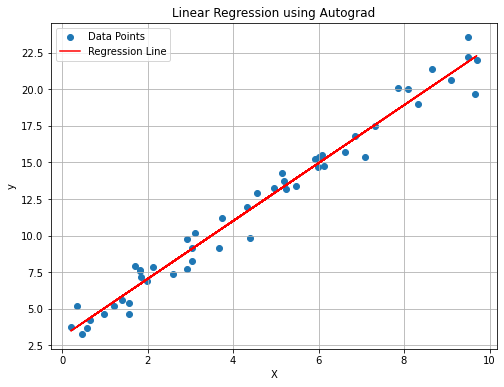

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import autograd.numpy as ag_np
from autograd import grad

# Generate some random data and form a linear function
np.random.seed(42)
X = np.random.rand(50, 1) * 10
y = 2 * X + 3 + np.random.randn(50, 1) # noisy line

# Define the linear regression model
def linear_regression(params, x):
    return ag_np.dot(x, params[0]) + params[1]

# Define the loss function = mean squared error
def mean_squared_error(params, x, y):
    predictions = linear_regression(params, x)
    return ag_np.mean((predictions - y) ** 2)

# Initialize parameters
initial_params = [ag_np.ones((1, 1)), ag_np.zeros((1,))]
lr = 0.01
num_epochs = 1000

# Gradient of the loss function using autograd
grad_loss = grad(mean_squared_error)

# Optimization loop
params = initial_params
for epoch in range(num_epochs):
    gradient = grad_loss(params, X, y)
    params[0] -= lr * gradient[0]
    params[1] -= lr * gradient[1]

# Extract the learned slope and intercept
slope = params[0][0, 0]
intercept = params[1][0]

# Plot the data points and the resulting line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Data Points')
plt.plot(X, slope * X + intercept, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression using Autograd')
plt.legend()
plt.grid(True)
plt.show()

Let us compare with `scikit_learn`

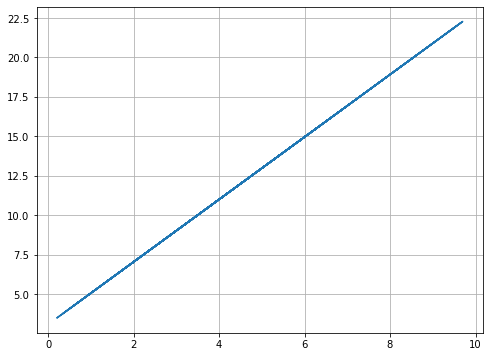

sklearn: intercept =  [3.09668927] slope =  [1.9776566]
autograd: intercept =  3.087098312274722 slope =  1.9791961905803472

In [2]:
from sklearn.linear_model import LinearRegression
# setup model
model = LinearRegression()
# fit
res = model.fit(X, y)
# predict
predictions = model.predict(X)
# plot
plt.figure(figsize=(8, 6))
plt.plot(X, predictions)
plt.grid(True)
plt.show()
print("sklearn: intercept = ",res.intercept_,"slope = ", res.coef_[0],)
print("autograd: intercept = ",intercept,"slope = ", slope,)